<a href="https://colab.research.google.com/github/cybertilla/Lab2/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task A2.1: Hey Nano! What's the Temp? (5 points - Mandatory)

Author: Bertilla Fabris

Date: 06-02-2024

I- Collect the data in a CSV file and submit it with the rest of your results (2pts-Mandatory)


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#read data from csv file, do not parse dates
nano_df = pd.read_csv('temp1.csv')
#change column headers
nano_df.rename(columns={"300000":"Time"}, inplace=True)
nano_df.rename(columns={"26":"Temperature"}, inplace=True)

nano_df


,Time,Temperature
0,301000,26
1,302000,26
2,303000,26
3,304000,26
4,305000,26
...,...,...
294,595000,27
295,596000,27
296,597000,27
297,598000,27




```
# This is formatted as code
```

II- Visualize the data with a line graph with two axes: time & temperature with these criteria (1pt-Mandatory)

The color of the line should be orange

Add labels for each axes (Temperature (degrees Celsius), Time(seconds)),

Turn on the grids

Add legend on the top right corner - *temperature*

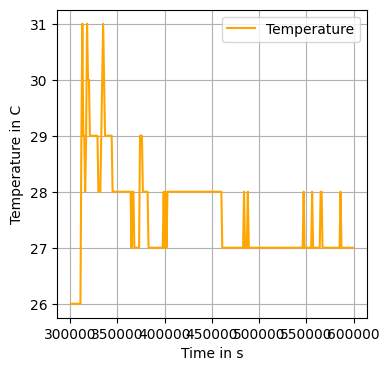

In [4]:
#using plt
plt.figure(figsize=(4, 4))
plt.plot(nano_df['Time'], nano_df['Temperature'], color='orange', label='Temperature')

plt.xlabel('Time in s')
plt.ylabel('Temperature in C')
plt.legend(loc='upper right')
plt.grid(True)

plt.show()

III- With the functions mentioned in the instruction above, write a code to delete rows with normal room temperature.
Delete the normal room temperature (24.3 for example) to compress the signal looking something like the two graphs below.
Visualize the data with the above criteria in a line graph. Pay attention that you might be needing to change an interval (for example 24.2 - 24.5) (2pt-Mandatory)

In [6]:
filtered = nano_df.drop(nano_df[(nano_df['Temperature'] <= 28)].index)
#note: the board was quite warm due to my old laptop (beside it) overheating
#the temperature sensor records the temp on the board itself
#the filtered df shows only temperatures above 28
filtered


,Time,Temperature
11,312000,29
12,313000,31
13,314000,29
14,315000,29
16,317000,29
17,318000,31
18,319000,30
19,320000,30
20,321000,29
21,322000,29


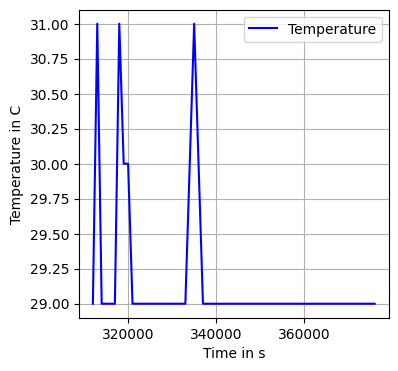

In [7]:
#plot the filtered dataset
plt.figure(figsize=(4, 4))
plt.plot(filtered['Time'], filtered['Temperature'], color='blue', label='Temperature')

plt.xlabel('Time in s')
plt.ylabel('Temperature in C')
plt.legend(loc='upper right')
plt.grid(True)

plt.show()

# Task A2.2: Freaking Frigid! (5 points- Mandatory)

Author: Bertilla Fabris

Date: 06-02-2024

I- Visualize the indoor and outdoor temperature in one plot with different colors of your choice
for the last week (start from the top 02-12-2018 to 08-12-2018).
(2 pts-Mandatory)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns

#read data from csv file, do not parse dates
df = pd.read_csv('IOT-temp.csv')

#create datetime var for lower limit date
date1 = datetime.datetime(2018, 12, 2)
#note that upper limit coincides with the last date recorded in dataset (no need to add filter for upper limit)

In [ ]:
#format datetime
df['noted_date'] = pd.to_datetime(df['noted_date'], format = '%d-%m-%Y %H:%M')
#check that date is datetime datatype by calling a datetime method
df.loc[0, 'noted_date'].day_name()

'Saturday'

<Axes: xlabel='noted_date', ylabel='temp'>

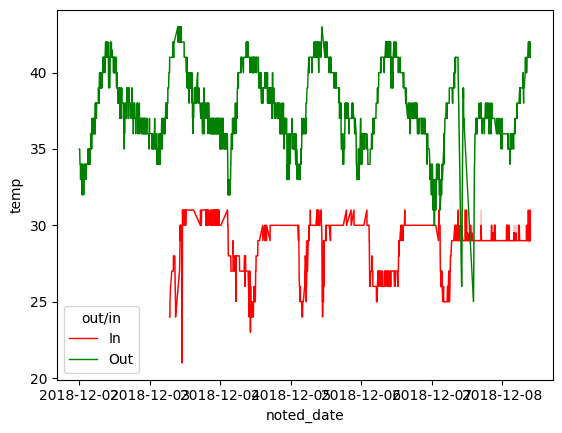

In [ ]:
#filter date range
last_week = df[df['noted_date'] >= date1]
#using seaborn for plotting with a red-green palette
sns.lineplot(data=last_week, x='noted_date', y='temp', hue='out/in', palette=['r','g'], linewidth=1)
#note: seaborn is quite slow compared to plt

In [ ]:
last_week

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,2018-12-08 09:30:00,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,2018-12-08 09:30:00,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,2018-12-08 09:29:00,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,2018-12-08 09:29:00,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,2018-12-08 09:29:00,31,In
...,...,...,...,...,...
6885,__export__.temp_log_173404_85aef0fb,Room Admin,2018-12-02 00:10:00,35,Out
6886,__export__.temp_log_173401_1097a0f5,Room Admin,2018-12-02 00:08:00,35,Out
6887,__export__.temp_log_173400_7b1e838d,Room Admin,2018-12-02 00:08:00,35,Out
6888,__export__.temp_log_173394_0312b549,Room Admin,2018-12-02 00:04:00,35,Out


II- Do these modifications on the dataframe made from the CSV dataset: (3pts Mandatory)
Change the "In" and "Out" text of the "Out\In" column to 1 and 0 respectively.

In [ ]:
#creating a copy of the dataframe for boolean values instead of out/in
bool_df = last_week.copy()
bool_df = bool_df.replace('Out', 0)
bool_df = bool_df.replace('In', 1)

bool_df


,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,2018-12-08 09:30:00,29,1
1,__export__.temp_log_196131_7bca51bc,Room Admin,2018-12-08 09:30:00,29,1
2,__export__.temp_log_196127_522915e3,Room Admin,2018-12-08 09:29:00,41,0
3,__export__.temp_log_196128_be0919cf,Room Admin,2018-12-08 09:29:00,41,0
4,__export__.temp_log_196126_d30b72fb,Room Admin,2018-12-08 09:29:00,31,1
...,...,...,...,...,...
6885,__export__.temp_log_173404_85aef0fb,Room Admin,2018-12-02 00:10:00,35,0
6886,__export__.temp_log_173401_1097a0f5,Room Admin,2018-12-02 00:08:00,35,0
6887,__export__.temp_log_173400_7b1e838d,Room Admin,2018-12-02 00:08:00,35,0
6888,__export__.temp_log_173394_0312b549,Room Admin,2018-12-02 00:04:00,35,0


Separate the date and time in the "noted_date" column, into two separate columns.

In [ ]:
#split columns of the dataframe copy
bool_df['Date'] = pd.to_datetime(bool_df['noted_date']).dt.date
bool_df['Time'] = pd.to_datetime(bool_df['noted_date']).dt.time
#save modification by adding inplace parameter
bool_df.drop(columns='noted_date', inplace = True)
bool_df

,id,room_id/id,temp,out/in,Date,Time
0,__export__.temp_log_196134_bd201015,Room Admin,29,1,2018-12-08,09:30:00
1,__export__.temp_log_196131_7bca51bc,Room Admin,29,1,2018-12-08,09:30:00
2,__export__.temp_log_196127_522915e3,Room Admin,41,0,2018-12-08,09:29:00
3,__export__.temp_log_196128_be0919cf,Room Admin,41,0,2018-12-08,09:29:00
4,__export__.temp_log_196126_d30b72fb,Room Admin,31,1,2018-12-08,09:29:00
...,...,...,...,...,...,...
6885,__export__.temp_log_173404_85aef0fb,Room Admin,35,0,2018-12-02,00:10:00
6886,__export__.temp_log_173401_1097a0f5,Room Admin,35,0,2018-12-02,00:08:00
6887,__export__.temp_log_173400_7b1e838d,Room Admin,35,0,2018-12-02,00:08:00
6888,__export__.temp_log_173394_0312b549,Room Admin,35,0,2018-12-02,00:04:00


Keep only the data of the last day 08-12-2018, and remove the rest of the rows with the appropriate function

In [ ]:
#declaring new datetime variable
target_day = datetime.datetime(2018, 12, 8)

new_df = bool_df.copy()

#check datatype format
new_df.loc[0, 'Date']

#filter df to display only target date
single_day_df = new_df[new_df['Date'] == target_day.date()]

#the new df "single_day_df" only contains the records for the target date
#with no restrictions on time

single_day_df


,id,room_id/id,temp,out/in,Date,Time
0,__export__.temp_log_196134_bd201015,Room Admin,29,1,2018-12-08,09:30:00
1,__export__.temp_log_196131_7bca51bc,Room Admin,29,1,2018-12-08,09:30:00
2,__export__.temp_log_196127_522915e3,Room Admin,41,0,2018-12-08,09:29:00
3,__export__.temp_log_196128_be0919cf,Room Admin,41,0,2018-12-08,09:29:00
4,__export__.temp_log_196126_d30b72fb,Room Admin,31,1,2018-12-08,09:29:00
...,...,...,...,...,...,...
601,__export__.temp_log_194442_8a532819,Room Admin,29,1,2018-12-08,00:03:00
602,__export__.temp_log_194439_8c07abc5,Room Admin,36,0,2018-12-08,00:02:00
603,__export__.temp_log_194438_3942217a,Room Admin,36,0,2018-12-08,00:02:00
604,__export__.temp_log_194436_61ca11ba,Room Admin,35,0,2018-12-08,00:00:00


Display the first few rows of the filtered dataframe to confirm the changes


In [ ]:
single_day_df.head()

,id,room_id/id,temp,out/in,Date,Time
0,__export__.temp_log_196134_bd201015,Room Admin,29,1,2018-12-08,09:30:00
1,__export__.temp_log_196131_7bca51bc,Room Admin,29,1,2018-12-08,09:30:00
2,__export__.temp_log_196127_522915e3,Room Admin,41,0,2018-12-08,09:29:00
3,__export__.temp_log_196128_be0919cf,Room Admin,41,0,2018-12-08,09:29:00
4,__export__.temp_log_196126_d30b72fb,Room Admin,31,1,2018-12-08,09:29:00


# Task A2.3: Digital Health IoT dataset (7 points - Mandatory/Optional)

Author: Bertilla Fabris

Date: 08-02-2024

I- Based on the instruction on the distribution transformation, transform the "calories" column to take the shape of a distribution close to normal distribution. The current distribution looks something like the below figure. Experiment with different transforms (log, cube, etc.) to find the right one. (1pts - Mandatory)

<Axes: >

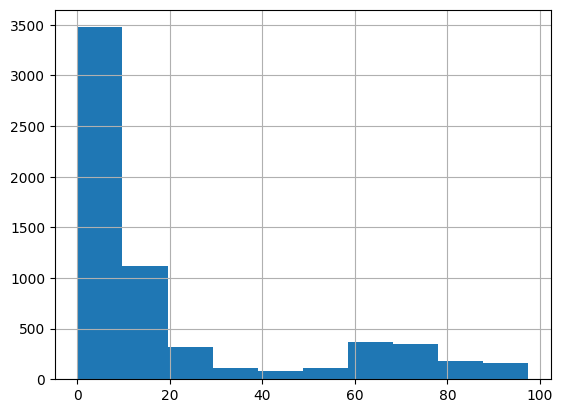

In [ ]:
#read data from csv file
aw_df = pd.read_csv('aw_fb_data.csv')
#display data in histogram
aw_df['calories'].hist()

<Axes: >

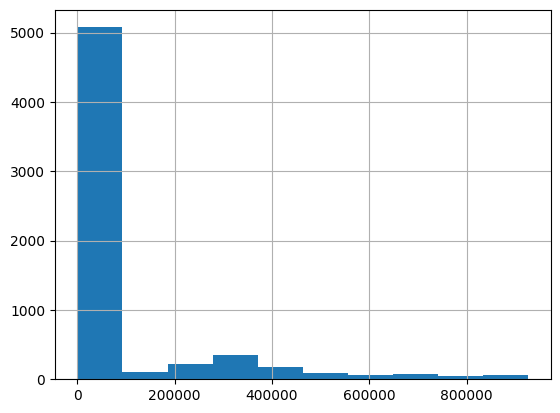

In [ ]:
#Cube transform
#note: code from lab preparation
transforms = aw_df.copy()
transforms['cube'] = transforms['calories'].transform(lambda x: np.power(x, 3))
transforms['cube'].hist()

<Axes: >

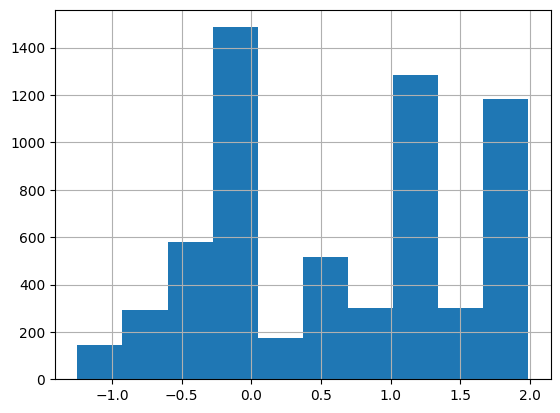

In [ ]:
#Log transform
#note: code from lab preparation
transforms = aw_df.copy()
transforms['log'] = transforms['calories'].transform(np.log10)
transforms['log'].hist()

#log transform gives us a distribution closer to normal as opposed to cube transform (in this case)

II- As mentioned before, the data reflects 46 participants. Make a copy of the original dataframe and Find a way to keep one sample from each participant.  Therefore, the new dataframe should have 46 rows. You should use a specific function or a mix of functions in the instruction. Afterward, visualize the "age", "height", and "weight" of the participants on each subplot (stacked plot). Grids should be on, Legends should be on top, and The color of the line plot for each subplot should be different. (2pts - Optional)

In [ ]:
#make a copy of the original df
aw_copy = aw_df.copy()
#drop duplicates
filter = aw_copy.drop_duplicates(subset=['age', 'gender', 'height', 'weight'])
#how many unique samples are there?
filter.shape[0]

49

III- Visualize "steps", "heart_rate", and "calories" of the first three participants in three plots with subplots (stacked plot), in a way that the steps of each three participants are depicted with different colored lines, the same for other two datasets. The legends should be on the top corner of each plot (participant #1, participant #2, participant#3) (2pts - Mandatory)

In [ ]:
filter_three = filter.head(3)
filter_three

,Unnamed: 0,X1,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
0,1,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.0,19.531302,0.138520,1.000000,0.089692,apple watch,Lying
76,77,77,30,0,164.0,68.0,10.771429,78.531302,0.344533,0.008327,6.026439,6.149747,69.6,1.0,8.931302,0.074180,8.846766,0.089692,apple watch,Lying
147,148,148,24,0,165.0,43.0,10.771429,79.916667,0.062826,0.008327,6.135030,6.189825,76.5,1.0,3.416667,0.028591,2.688587,0.089692,apple watch,Lying


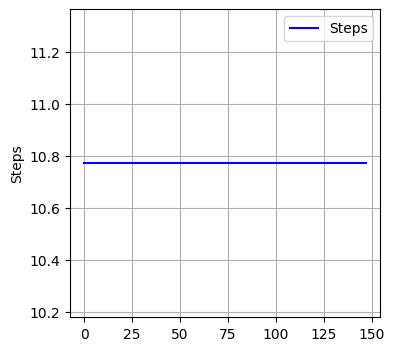

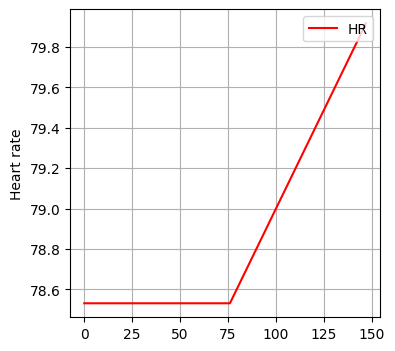

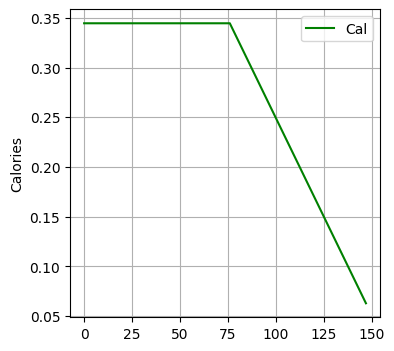

In [ ]:
plt.figure(figsize=(4, 4))
plt.plot(filter_three['steps'], color='blue', label='Steps')

plt.ylabel('Steps')
plt.legend(loc='upper right')
plt.grid(True)

plt.figure(figsize=(4, 4))
plt.plot(filter_three['hear_rate'], color='red', label='HR')

plt.ylabel('Heart rate')
plt.legend(loc='upper right')
plt.grid(True)

plt.figure(figsize=(4, 4))
plt.plot(filter_three['calories'], color='green', label='Cal')

plt.ylabel('Calories')
plt.legend(loc='upper right')
plt.grid(True)

plt.show()

IV- Normalize the "age", "height", and "weight", and Standardize "steps" and "height rate" columns in a separate column at the end of the dataframe (1pts - Mandatory)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = MinMaxScaler()
standard = StandardScaler()

#scale Age, Heigth and Weigth
aw_copy['Age'] = scaler.fit_transform(aw_copy[['age']])
aw_copy['Heigt'] = scaler.fit_transform(aw_copy[['height']])
aw_copy['Weigth'] = scaler.fit_transform(aw_copy[['weight']])

#normalise HR and Steps
aw_copy['HR'] = standard.fit_transform(aw_copy[['hear_rate']])
aw_copy['Steps'] = standard.fit_transform(aw_copy[['steps']])


Display the first few rows to verify the changes

In [ ]:
print("Normalised values")
print(aw_copy[['Age', 'Heigt', 'Weigth']].head())
print("\n Standardised values")
print(aw_copy[['HR', 'Steps']].head())
#note: I was not sure why I'm getting negative values for standards
#but perhaps it just means that the values are below mean?

Normalised values
        Age     Heigt    Weigth
0  0.052632  0.520833  0.311111
1  0.052632  0.520833  0.311111
2  0.052632  0.520833  0.311111
3  0.052632  0.520833  0.311111
4  0.052632  0.520833  0.311111

 Standardised values
         HR     Steps
0 -0.265692 -0.443445
1 -0.268411 -0.440286
2 -0.265359 -0.437126
3 -0.262307 -0.433967
4 -0.259255 -0.430807


V- Split the dataset into three categories with the following distribution: Train (70%), Validation (15%), and Test (15%) (1pts - Mandatory)


In [ ]:
#note: followed https://stackoverflow.com/questions/38250710/how-to-split-data-into-3-sets-train-validation-and-test
from sklearn.model_selection import train_test_split

#initialise variables for the proportions of both splits
first_split = 0.3
second_split = 0.5

#use train test split method (twice, with the use of a temporary set)
train_set, temporary = train_test_split(aw_copy, test_size=first_split)
val_set, test_set = train_test_split(temporary, test_size=second_split)

print(len(aw_copy))
print(len(train_set))
print(len(val_set))
print(len(test_set))

#check with proportions
# 100:6264=70:4382
# 100:6264=15:940
#note: some decimals are rounded


6264
4384
940
940
